# Задание 2
# Ляшук Александр - 14 ПМИ
# Вариант 8
## Данные - MAGIC Gamma Telescope
https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope
### Примеры использование нейронных сетей

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pylab import rcParams

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter('ignore')
%matplotlib inline
rcParams['figure.figsize'] = (15.0, 8.0)
np.random.seed(13)

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

from keras.regularizers import l2

roc_auc_data = []
scores = []

Using TensorFlow backend.


### Выгрузим данные в Pandas DataFrame

In [3]:
data = pd.read_csv('../data/magic04.data',header=None)
data.columns = ['Length', 'Width','Size','Conc','Conc1','Asym','M3Long','M3Trans','Alpha','Dist','class']

In [4]:
data.head()

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


### Описание данных
`1.  Length:  continuous  # major axis of ellipse [mm] `  
`2.  Width:   continuous  # minor axis of ellipse [mm] `  
`3.  Size:    continuous  # 10-log of sum of content of all pixels [in #phot] `  
`4.  Conc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]`  
`5.  Conc1:   continuous  # ratio of highest pixel over fSize  [ratio] `  
`6.  Asym:    continuous  # distance from highest pixel to center, projected onto major axis [mm] `  
`7.  M3Long:  continuous  # 3rd root of third moment along major axis  [mm] `  
`8.  M3Trans: continuous  # 3rd root of third moment along minor axis  [mm] `   
`9.  Alpha:   continuous  # angle of major axis with vector to origin [deg] `  
`10. Dist:    continuous  # distance from origin to center of ellipse [mm] `  
`11. class:    g,h         # gamma (signal), hadron (background) `  

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
Length     19020 non-null float64
Width      19020 non-null float64
Size       19020 non-null float64
Conc       19020 non-null float64
Conc1      19020 non-null float64
Asym       19020 non-null float64
M3Long     19020 non-null float64
M3Trans    19020 non-null float64
Alpha      19020 non-null float64
Dist       19020 non-null float64
class      19020 non-null object
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


### Разделим данные на обучающую и тестовую выборку

In [6]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1]
y = y.map({'g' : 1, 'h' : 0})

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=7)

### Построим модель нейронной сети используя keras

In [13]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=10))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics = ['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                176       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


### Посмотрим ошибку на тренировочной и тестовой выборке в зависимости от количества эпох для обучения

In [15]:
train_err_main = []
test_err_main = []

for i in range(0,100):
    model.fit(
        X_train, y_train, 
        batch_size = 32, 
        epochs = 1,
        verbose = 0
    )
    train_err_main.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_main.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))

4192/6277 [===================>..........] - ETA: 0s

### График ошибок на тренировочной и тестовой выборке от количества эпох

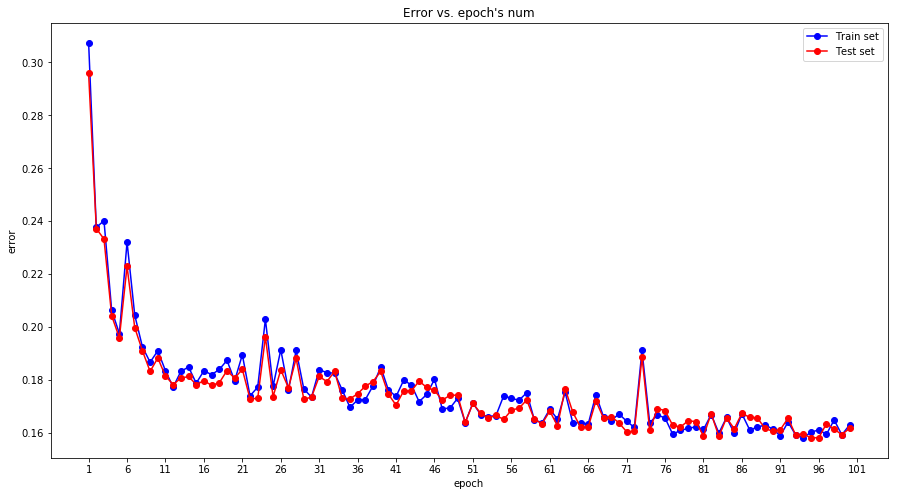

In [31]:
plt.plot(train_err_main, 'b-o', label = 'Train set')
plt.plot(test_err_main, 'r-o', label = 'Test set')
plt.title("Error vs. epoch's num")
plt.xticks(list(range(0,101,5)), list(range(1,102,5)))
plt.xlabel('epoch')
plt.ylabel('error')
plt.legend()

- Видно, что к 95 эпохе модель сходится, а дальше начинает вести себя нестабильно

In [28]:
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_main == min(train_err_main))[0][0],"эпохе -", min(train_err_main))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_main == min(test_err_main))[0][0],"эпохе -", min(test_err_main))

Наименьшая ошибка на тренировочной выборке на 93 эпохе - 0.158204504434
Наименьшая ошибка на тестовой выборке на 94 эпохе - 0.158037278955


### Далее, будем менять параметр L2 регуляризации и обучать 95 эпох

In [34]:
train_err_l2 = []
test_err_l2 = []
for i in [10**_ for _ in range(3,-9,-1)]:
    model = Sequential()
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(i), input_dim=10))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='adam', metrics = ['accuracy'])
    model.fit(
        X_train, y_train, 
        batch_size = 32, 
        epochs = 95,
        verbose = 0
    )
    train_err_l2.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_l2.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))

4768/6277 [=====================>........] - ETA: 0s

### График ошибок на тренировочной и тестовой выборке от L2 

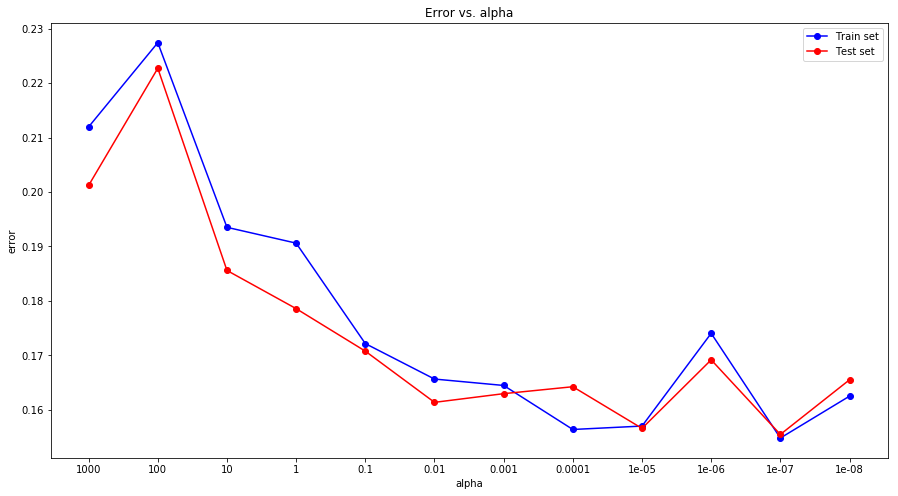

In [35]:
plt.plot(train_err_l2, 'b-o', label = 'Train set')
plt.plot(test_err_l2, 'r-o', label = 'Test set')
plt.title('Error vs. alpha')
plt.xticks(range(12),[10**_ for _ in range(3,-9,-1)])
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

In [44]:
print("Наименьшая ошибка на тренировочной выборке при alpha=0.0000001","-", min(train_err_l2))
print("Наименьшая ошибка на тестовой выборке  при alpha=0.0000001","-", min(test_err_l2))

Наименьшая ошибка на тренировочной выборке при alpha=0.0000001 - 0.154830102802
Наименьшая ошибка на тестовой выборке  при alpha=0.0000001 - 0.155488290585


### Изменим модель, убрав один полносвязный слой

In [41]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=10))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics = ['accuracy'])

train_err_delete = []
test_err_delete = []

for i in range(0,100):
    model.fit(
        X_train, y_train, 
        batch_size = 32, 
        epochs = 1,
        verbose = 0
    )
    train_err_delete.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_delete.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))

5216/6277 [=======================>......] - ETA: 0s

In [42]:
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_delete == min(train_err_delete))[0][0],"эпохе -", min(train_err_delete))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_delete == min(test_err_delete))[0][0],"эпохе -", min(test_err_delete))

Наименьшая ошибка на тренировочной выборке на 93 эпохе - 0.163383818567
Наименьшая ошибка на тестовой выборке на 96 эпохе - 0.159471084913


### Теперь попробуем уменьшить и увеличить количество нейронов

In [45]:
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=10))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics = ['accuracy'])

train_err_8 = []
test_err_8 = []

for i in range(0,100):
    model.fit(
        X_train, y_train, 
        batch_size = 32, 
        epochs = 1,
        verbose = 0
    )
    train_err_8.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_8.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=10))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics = ['accuracy'])

train_err_32 = []
test_err_32 = []

for i in range(0,100):
    model.fit(
        X_train, y_train, 
        batch_size = 32, 
        epochs = 1,
        verbose = 0
    )
    train_err_32.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_32.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))

4864/6277 [======================>.......] - ETA: 0s

In [49]:
print("Dense(8)")
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_8 == min(train_err_8))[0][0],"эпохе -", min(train_err_8))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_8 == min(test_err_8))[0][0],"эпохе -", min(test_err_8))
print("Dense(32)")
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_32 == min(train_err_32))[0][0],"эпохе -", min(train_err_32))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_32 == min(test_err_32))[0][0],"эпохе -", min(test_err_32))

Dense(8)
Наименьшая ошибка на тренировочной выборке на 95 эпохе - 0.174762614769
Наименьшая ошибка на тестовой выборке на 95 эпохе - 0.167755297116
Dense(32)
Наименьшая ошибка на тренировочной выборке на 99 эпохе - 0.155850270737
Наименьшая ошибка на тестовой выборке на 97 эпохе - 0.156444161224


### Отобразим полученные результаты на одной картинке

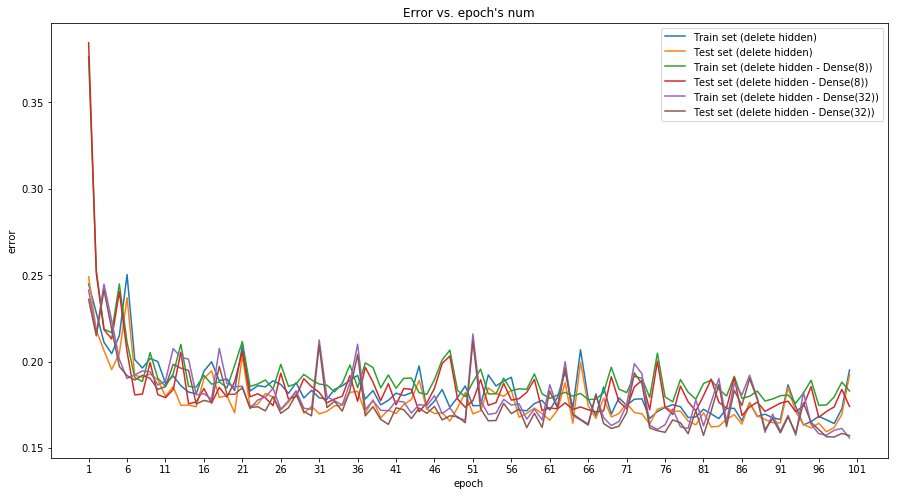

In [57]:
plt.plot(train_err_delete, label = 'Train set (delete hidden)')
plt.plot(test_err_delete, label = 'Test set (delete hidden)')
plt.plot(train_err_8, label = 'Train set (delete hidden - Dense(8))')
plt.plot(test_err_8, label = 'Test set (delete hidden - Dense(8))')
plt.plot(train_err_32, label = 'Train set (delete hidden - Dense(32))')
plt.plot(test_err_32, label = 'Test set (delete hidden - Dense(32))')

plt.title("Error vs. epoch's num")
plt.xticks(list(range(0,101,5)), list(range(1,102,5)))
plt.xlabel('epoch')
plt.ylabel('error')
plt.legend()

In [53]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=10))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics = ['accuracy'])

train_err_64 = []
test_err_64 = []

for i in range(0,100):
    model.fit(
        X_train, y_train, 
        batch_size = 32, 
        epochs = 1,
        verbose = 0
    )
    train_err_64.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_64.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))
    
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=10))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics = ['accuracy'])

train_err_128 = []
test_err_128 = []

for i in range(0,100):
    model.fit(
        X_train, y_train, 
        batch_size = 32, 
        epochs = 1,
        verbose = 0
    )
    train_err_128.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_128.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))
    
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=10))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics = ['accuracy'])

train_err_256 = []
test_err_256 = []

for i in range(0,100):
    model.fit(
        X_train, y_train, 
        batch_size = 32, 
        epochs = 1,
        verbose = 0
    )
    train_err_256.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_256.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))
    
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=10))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics = ['accuracy'])

train_err_512 = []
test_err_512 = []

for i in range(0,100):
    model.fit(
        X_train, y_train, 
        batch_size = 32, 
        epochs = 1,
        verbose = 0
    )
    train_err_512.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_512.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))

6240/6277 [============================>.] - ETA: 0s

## Выводы и лучшие результаты 

In [61]:
print("Dense(16) + Dense(16)")
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_main == min(train_err_main))[0][0],"эпохе -", min(train_err_main))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_main == min(test_err_main))[0][0],"эпохе -", min(test_err_main))
print("Наименьшая ошибка на тренировочной выборке при alpha=0.0000001","-", min(train_err_l2))
print("Наименьшая ошибка на тестовой выборке при alpha=0.0000001","-", min(test_err_l2))
print()
print("Dense(16)")
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_delete == min(train_err_delete))[0][0],"эпохе -", min(train_err_delete))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_delete == min(test_err_delete))[0][0],"эпохе -", min(test_err_delete))
print()
print("Dense(8)")
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_8 == min(train_err_8))[0][0],"эпохе -", min(train_err_8))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_8 == min(test_err_8))[0][0],"эпохе -", min(test_err_8))
print()
print("Dense(32)")
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_32 == min(train_err_32))[0][0],"эпохе -", min(train_err_32))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_32 == min(test_err_32))[0][0],"эпохе -", min(test_err_32))
print()
print("Dense(64)")
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_64 == min(train_err_64))[0][0],"эпохе -", min(train_err_64))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_64 == min(test_err_64))[0][0],"эпохе -", min(test_err_64))
print()
print("Dense(128)")
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_128 == min(train_err_128))[0][0],"эпохе -", min(train_err_128))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_128 == min(test_err_128))[0][0],"эпохе -", min(test_err_128))
print()
print("Dense(256)")
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_256 == min(train_err_256))[0][0],"эпохе -", min(train_err_256))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_256 == min(test_err_256))[0][0],"эпохе -", min(test_err_256))
print()
print("Dense(512)")
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_512 == min(train_err_512))[0][0],"эпохе -", min(train_err_512))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_512 == min(test_err_512))[0][0],"эпохе -", min(test_err_512))

Dense(16) + Dense(16)
Наименьшая ошибка на тренировочной выборке на 93 эпохе - 0.158204504434
Наименьшая ошибка на тестовой выборке на 94 эпохе - 0.158037278955
Наименьшая ошибка на тренировочной выборке при alpha=0.0000001 - 0.154830102802
Наименьшая ошибка на тестовой выборке при alpha=0.0000001 - 0.155488290585

Dense(16)
Наименьшая ошибка на тренировочной выборке на 93 эпохе - 0.163383818567
Наименьшая ошибка на тестовой выборке на 96 эпохе - 0.159471084913

Dense(8)
Наименьшая ошибка на тренировочной выборке на 95 эпохе - 0.174762614769
Наименьшая ошибка на тестовой выборке на 95 эпохе - 0.167755297116

Dense(32)
Наименьшая ошибка на тренировочной выборке на 99 эпохе - 0.155850270737
Наименьшая ошибка на тестовой выборке на 97 эпохе - 0.156444161224

Dense(64)
Наименьшая ошибка на тренировочной выборке на 99 эпохе - 0.155850270737
Наименьшая ошибка на тестовой выборке на 93 эпохе - 0.155169667038

Dense(128)
Наименьшая ошибка на тренировочной выборке на 96 эпохе - 0.139135211489
Н

Как видим, увеличение количества нейронов уменьшают ошибку, однако с 512 нейронов видно, что сложность сети начинает негативно влиять на качество классификации.  
- **Наименьшая ошибка** - *Dense(256)* - 0.139238489724